<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equivalence Analysis
### Are *local RSS minimization* and *RSS gain maximization* equivalent?


Consider the simple dataset with one feature $X$ and labels $y$:
$$
\begin{array}{|c|c|c|}
\hline
\text{X} & \text{y} \\
\hline
1 & 1  \\
2 & 2 \\
3 & 6  \\
4 & 8  \\
5 & 10  \\
\hline
\end{array}
$$

**The first step** of both methods is the same - split the data into 2 parts, based on the value of $X$. At the beginning, there is only one node to split, so we compute the total RSS, which is equivalent to the local RSS. As the *parent RSS* is constant (due to there being just one node) *RSS gain* maximization is equivalent to *local RSS* minimization.

The threshold is $X < 3$. For this split, the RSS $\sum_m\sum_i(y_i-\overline{y_{R_m}})^2$ is minimal. Now we have:

*  Left leaf: $X < 3$: $x\in\{1,2\},\quad \overline{y}=\frac{1+2}{2}=1.5,\quad\sum_i(y_i-\overline{y})^2=(1-1.5)^2+(2-1.5)^2=0.5$
*  Right leaf: $X \geq 3$: $x\in\{3,4,5\},\quad \overline{y}=\frac{6+8+10}{3}=8,\quad\sum_i(y_i-\overline{y})^2=(6-8)^2+(10-8)^2=8$

But **the second step differs**:

**If we split left leaf** (using  the condition $X< 2$), we obtain two new leaves, each with *local RSS* equals to $0$, since each leaf will contain only one element ($x\in\{1\}$ and $x\in\{2\}$).

**If we split right leaf**, the condition is $X< 4$ (note: $X < 4$ gives the same local RSS), we get two new leaves:


*   *(child)* Left leaf: $X < 5$: $x\in\{3\}, \quad \overline{y}=6,\quad\sum_i(y_i-\overline{y})^2=0$
*  *(child)* Right leaf: $X \geq 5$: $x\in\{4,5\}, \quad \overline{y}=\frac{8+10}{2},\quad\sum_i(y_i-\overline{y})^2=2$

Since *local RSS* equals $0$ in the first case (splitting the left leaf) and equals to $0+2=2$ in the second case (splitting the right leaf), **Local RSS Minimization algorithm selects the first case**.

However, if we compute the reduction in RSS:


*   Splitting the left leaf: reduction = $0.5 - 0 = 0.5$
*   Splitting the right leaf: reduction = $8 - 2 = 6$

So the *RSS Gain Maximization* algorithm selects the second case, as the RSS reduction is greater.

Thus, *local RSS minimization* and *RSS gain maximization* are **not** equivalent.


### Does *total RSS minimization* coincide with either of these two, or is it distinct?

*Total RSS minimization* **is equivalent to** *RSS Gain Maximization*

Proof:

Suppose we choose feature $X$, threshold $t$ and split leaf $M$.

Note that the *total RSS* after the split is::
$$\sum_{m\in\textit{Leaves}(T(X,t))}\sum_{i\in R_m}(y_i-\overline{y_{R_m}})^2=\sum_{m\in\textit{Leaves}(T(X,t))\backslash\{M\}}\sum_{i\in R_m}(y_i-\overline{y_{R_m}})^2-\underbrace{\left(\sum_{i\in R_M}(y_i-\overline{y_{R_M}})^2 - \sum_{m=1}^2\sum_{i\in R_m}(y_i-\overline{y_{R_m}})^2\right)}_{\text{Parent RSS - Children RSS = RSS Gain}}$$
*All notations are consistent with those used in class. Note that $\textit{Leaves}(T(X,t))\backslash\{M\}$ is the set of all leaves except the one being split.*

As we can see, **minimization *total RSS value* is equivalent to *maximization RSS Gain* ,** because the term:
$$\sum_{m\in\textit{Leaves}(T(X,t))\backslash\{M\}}\sum_{i\in R_m}(y_i-\overline{y_{R_m}})^2$$
is constant- this is the sum of RSS in all leaves except $M$ - the one which was split, which means that methods *Total RSS minimization* and *RSS Gain Maximization* are equivalent.


# Empirical Experiment

To determine which of the alghorhitm (*Local RSS Minimization* or equivalent *RSS Gain Maximization* and *Total RSS Minimization*) is implemented in `scikit-learn` in `DecisionTreeRegressor` I use the same dataset:
$$
\begin{array}{|c|c|c|}
\hline
\text{X} & \text{y} \\
\hline
1 & 1  \\
2 & 2 \\
3 & 6  \\
4 & 8  \\
5 & 10  \\
\hline
\end{array}
$$

As explained above, *Local RSS Minimization* would prefer to split the $\{1,2\}$ group before the $\{3,4,5\}$ group. Thus, we can detect the used algorithm by limiting the number of leaves. I use the `max_leaf_nodes` parameter in `DecisionTreeRegressor()`.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

X = np.array([[1], [2], [3], [4], [5]]).astype(float)
y = np.array([1, 2, 6, 8, 10]).astype(float)

tree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

I visualize the decision tree using `plot_tree` from `sklearn.tree` and `matplotlib`:

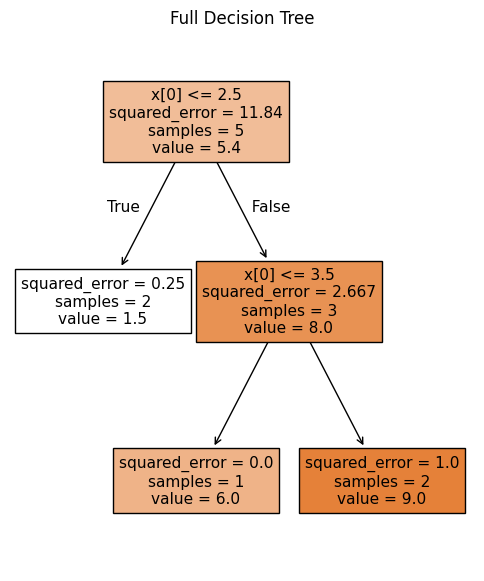

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 7))
plot_tree(
    tree,
    filled=True
)
plt.title("Full Decision Tree")
plt.show()

As we can see, the split of the $\{3,4,5\}$ group is preferred by the algorithm used in `DecisionTreeRegressor`.

This indicates that the implementation in `scikit-learn` uses *RSS Gain Maximization* or *Total RSS Minimization*.